#**Trabalho 1 - Tópicos Especiais em Computação Científica II 2022/2**

**Nome: Bruno Baptista Guerra - 2016203441**

14/02/2022


---


O objetivo geral deste trabalho é a simulação de um modelo epidêmico SIR-Vetorial da Dengue, permitindo alterações nos códigos para as necessidades do usuário. Foi feito um modelo introdutório com SIR, depois impletou-se com o vetor *Aedes aegypti* e por fim, foi considerado com mais de um sorotipo.

No decorrer do *notebook* será disposto as referências que foram utilizadas para chegar nas taxas utilizadas.

Os códigos utilizados são da autoria do autor ou disponibilizados pelo professor da disciplina.

# Bibliotecas
---
A partir dos códigos disponibilizados pelo professor durante as aulas, importamos todas as bibliotecas na seção abaixo para fins de deixar orginzado em apenas um bloco no *notebook*

In [ ]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import itertools

#1. Modelos



---



## Modelo SIR com nascimentos e mortes:


---





Nesse modelo, a população é dividida em quatro compartimentos: 

- **S(t)**  é usado para representar o número de indivíduos não infectados com a doença no momento t, ou aqueles suscetíveis à doença.
- **I(t)** representa o número de indivíduos que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria susceptível
- **R(t)**  é o compartimento utilizado para aqueles indivíduos que foram infectados e, de seguida, removidos a partir da doença, quer devido à imunização ou devido à morte.

In [ ]:
def sir_model(y, t, beta, gamma, mu):
    S, I, R = y
    
    dS_dt = -beta*S*I + mu*(I + R)
    dI_dt = beta*S*I - gamma*I - mu*I
    dR_dt = gamma*I - mu*R
    
    return [dS_dt, dI_dt, dR_dt]

In [ ]:
# Total population, N.
N = 209.3*10**6 
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 190294, 1283
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma, mu = 0.75, 0.25, 6./1000  
# A grid of time points (in days)

t = np.linspace(0, 365, 365)

# condições iniciais
S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 0.35
gamma = 0.1
mu = 0.001

# Time vector
y = S0, I0, R0
t = np.linspace(0, 100, 10000)

# Result
solucao = scipy.integrate.odeint(sir_model, y, t, args=(beta, gamma,mu))
solucao = np.array(solucao)

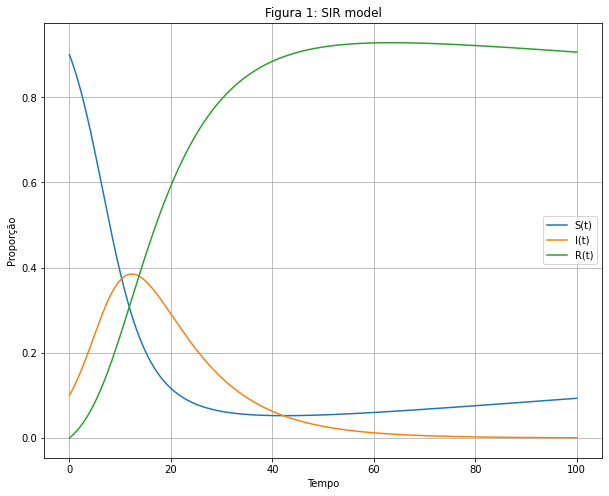

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(t, solucao[:, 0], label="S(t)")
plt.plot(t, solucao[:, 1], label="I(t)")
plt.plot(t, solucao[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Proporção")
plt.title("Figura 1: SIR model")

plt.show()

## SIR-Vector Model



---




Uma forma simples de modelar uma endemia, que depende de
um vetor para se propagar.

| Parâmetro                            |Descrição   | 
|---------------------------------|--------------------|
| Nh           | População da Amostra |
| A         | Taxa constante de novos mosquitos que entram na população  |
| μv                | Taxa de mortalidade dos mosquitos         |

\\

| Parâmetro                            |Descrição   | 
|---------------------------------|--------------------|
| βh           | Probabilidade de transmissão do Vetor-Humanos |
| γ         | Taxa de humanos infectados que se recuperam e ficam imunes doença  |
| μh                | Taxa de mortalidade dos humanos não relacionado a doença         |
| b    | Quantidade de mordida de mosquito por dia (Média) |
| m | Número de hospedeiros alternativos   |
| βv        | Probabilidade de transmissão do Humanos-Vetor |
| Sh        | Número de humanos suscetíveis |
| Ih        | Número de humanos infectados |
| Rh        | Número de humanos recuperados |
| Sv        | O número de vetores suscetíveis |
| Iv        | O número de vetores infectados |
| t        | Tempo (dias) |


\\

Figura 2: Compartimento da população humana e vetores

![picture](https://drive.google.com/uc?id=1FVyPPSJDkS26lrfacFgQU6P9Xv8MZlmu)

Fonte: (Böhm et al, 2016)

In [ ]:
def sir_vector_model(y, t, Nh, Bh, gamma, u_h, b, m, A, u_v, Bv, T):
    Sh, Ih, Rh, Sv, Iv = y
    dShdt = u_h*(Nh-Sh) - ((Bh * b)*(Sh * Iv)/(Nh + m))
    dIhdt = (Bh * b) * (Sh * Iv)/ (Nh + m)  - ((u_h + gamma) * Ih)
    dRhdt = (gamma * Ih) - (u_h * Rh)
    dSvdt = A - ((Bv *  b)*(Sv*Ih)/(Nh + m)) - (u_v * Sv) 
    dIvdt = ((Bv * b)*(Sv*Ih)/(Nh+m)) - (u_v * Iv)

    return dShdt, dIhdt, dRhdt, dSvdt, dIvdt

A abordagens matemática,nos permite examinar a condição
de limite e determinar a estabilidade local ou global através
de experimentos analíticos. Além disso, também é possível
examinar o impacto de várias estratégias de intervenção (por
exemplo, controle de vetores) na progressão epidêmica em
uma população hipotética, estendendo os pressupostos extrínsecos

In [ ]:
# População da amostra
populacao = [10000]

# A, taxa constante de novos mosquitos que entram na população;
novos_mosquitos = [1600, 3200] 
# μv Mortalidade per capita dos mosquitos
mortalide_mosquitos = [0.1, 0.25] # 0.1 0.25

# Casos registrados para cada 100 mil habitantes em 2018 [https://www.apm.org.br/ultimas-noticias/brasil-tem-mais-de-14-milhao-de-casos-provaveis-de-dengue-em-2022/]
infectados = 0.006563

# https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html
taxa_mortalidade = 6.08



Foram realizadas dez simulações com o modelo matemático
para a análise dos resultados. Ao longo destas simulações,
variou-se os parâmetros explícitos conforme o produto das
matrizes:

*   Nh: População da amostra, se manteve um número
constante, mantendo a proporção com a população de
infectados; [10000]
*   A: Taxa constante de novos mosquitos que entram na
população; [1600, 3200, 5000]
*   u_v - Mortalidade per capita dos mosquitos. [0.1, 0.25]



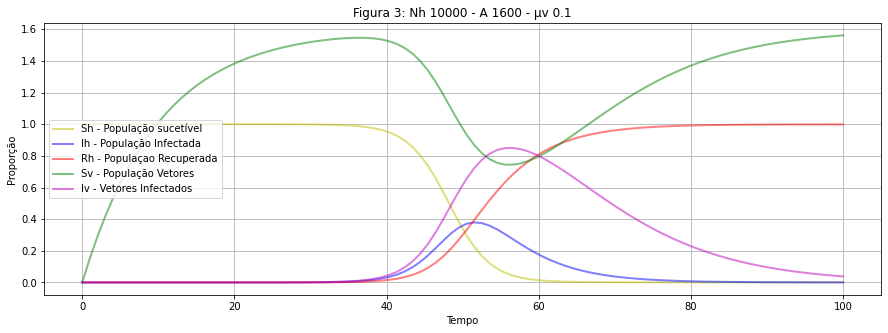

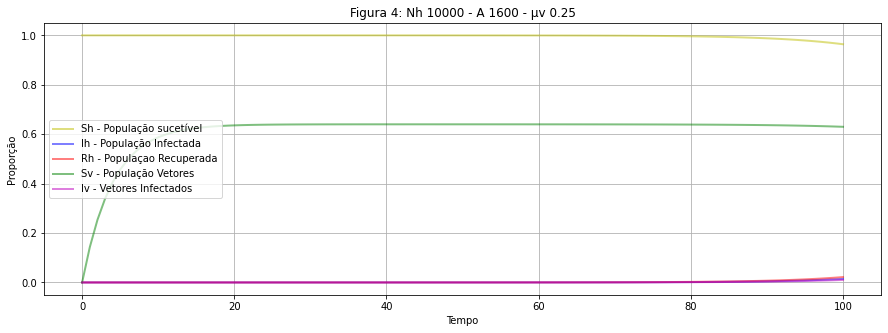

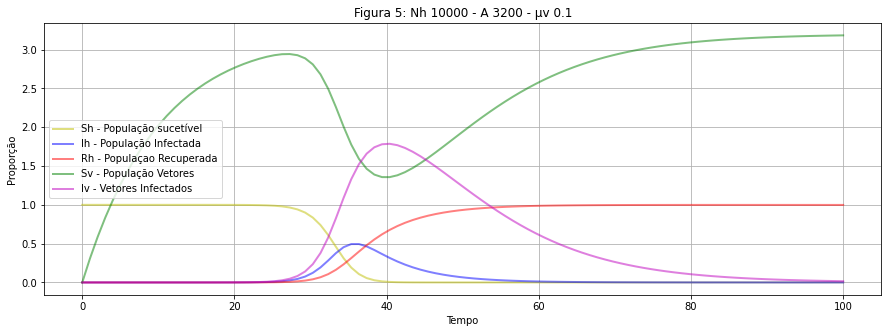

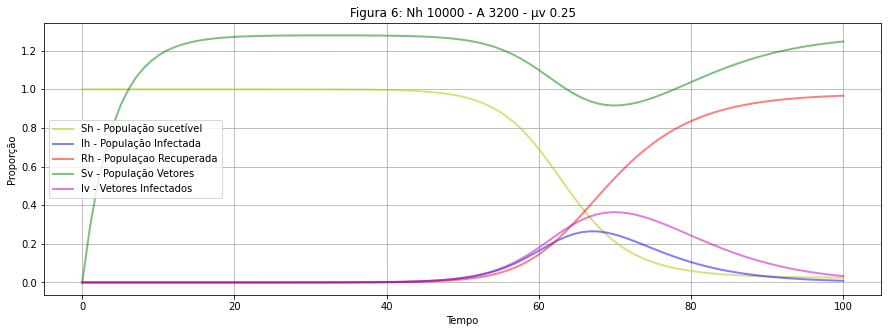

In [ ]:
#[1] M. Andraud, N. Hens, C. Marais, and P. Beutels, “Dynamic epidemiological models for dengue transmission: A systematic review of structural approaches,” PLOS ONE, vol. 7, no. 11, pp. 1–14, 11 2012. [Online]. Available: https://doi.org/10.1371/journal.pone.0049085
#[2] A. W. Böhm, C. d. S. Costa, R. G. Neves, T. R. Flores, and B. P. Nunes, “Dengue incidence trend in brazil, 2002-2012,” Epidemiologia e Serviços de Saúde, vol. 25, no. 4, pp. 725–733, 2016
#[3] H. Nishiura et al., “Mathematical and statistical analyses of the spread of dengue.” Dengue Bulletin, 2006.

for idx, (Nh, A, u_v) in enumerate(itertools.product(populacao, novos_mosquitos, mortalide_mosquitos)):
    
    # βh Probabilidade de transmissão do Vetor -> Humanos
    Bh = 0.4 # [3]
    # Taxa de humanos infectados que se recuperam e ficam imunes a doença;
    gamma = 0.167 # [3]
    # μh Taxa percapita de mortalidade dos humanos não relacionado a doença
    u_h = 0.0000457 # [3]
    # b, Quantas vezes por dia um mosquito morde as pessoas.
    b = 1  # [3]
    # m, Numero dos hospediros alternativos;
    m = 0 # [3]
    # βv Probabilidade de transmissão Humano -> Vetor
    Bv = 0.4 # [3]
    # Infected Humans: Número de individuos infectados quando o modelo começou a rodar;
    Ih = infectados 
    # Número de individuos recuperados no inicio da execução do modelo;
    Rh = infectados 
    # Susceptible Vectors: O número de vetores suscetíveis no início da execução do modelo.
    Sv = 0
    # Infected Vector: O número de vetores infectados no início da execução do modelo.
    Iv = 0.00057
    # Initial: Numero dos humanos sucetiveis no inicio do modelo
    Sh = Nh - Ih

    T = 100
    t0 = 0
    t = np.linspace(t0, T, T)

    y0 = Sh, Ih, Rh, Sv, Iv # Vetor de condições inciais

    args = Nh, Bh, gamma, u_h, b, m, A, u_v, Bv, T

    ret = scipy.integrate.odeint(sir_vector_model, y0, t, args=args)
    #ret = scipy.integrate.ode(sir_vector_model, t, y0).set_f_params(args=args)

    Sh, Ih, Rh, Sv, Iv = ret.T
    
    plt.figure(figsize=[15,5])
    plt.plot(t, Sh/Nh, 'y', alpha=0.5, lw=2, label='Sh - População sucetível')
    plt.plot(t, Ih/Nh, 'b', alpha=0.5, lw=2, label='Ih - População Infectada')
    plt.plot(t, Rh/Nh, 'r', alpha=0.5, lw=2, label='Rh - Populaçao Recuperada')
    plt.plot(t, Sv/Nh, 'g', alpha=0.5, lw=2, label='Sv - População Vetores')
    plt.plot(t, Iv/Nh, 'm', alpha=0.5, lw=2, label='Iv - Vetores Infectados')
    plt.grid()
    plt.legend(loc='center left')
    plt.xlabel("Tempo")
    plt.ylabel("Proporção")
    plt.title("Figura {}: Nh {} - A {} - μv {}".format(idx+3, Nh, A, u_v))
    plt.show()

Na Figura 3, podemos observar que a população do mosquitos vai crescento até aproximadamente o 40° dia que pode ser observado pela transferência da população humana para infectados da mesma forma que os vetores ficam infectados. Porém com a queda de mosquitos, os humanos vão se recuperando e a doença não consegue mais se itensificar, chegando ao ponto de ter muitos mosquitos mas quase nenhum infectante.

Para a Figura 4, em comparação a simulação anterior, aumentou-se a taxa de mortalidade dos vetores levando há nenhum contágio da doença. Isso se deve de que a densidade de vetores da Dengue ser muito inferior aos humanos, não havendo proliferação suficiente para um surto endêmico.

Nesta Figura 5, aumentou-se a taxa de novos mosquitos que entram na população e volto a diminuir a taxa de mortalidade dos mesmos. Pode-se observar que as curvas de cada compartimento se comportaram de maneira similar a Figura 3, mas como os vetores foram dobrados, os acontecimentos foram antecipados e a população se recuperou mais rápido da dengue.

Já para Figura 6, como cresceu a taxa de mortalidade dos vetores, a população cresceu a ponto de ficar maior que a de humanos mas atrasou para começar a se infectar para aproximadamente o 50° dia, levando a uma infecção muito rápida da população humana e em seguida uma recuperação.

## SIR-vector models and multiple infections

Figura 7: Compartimento da população humana e vetores com 2 sorotipos

![picture](https://drive.google.com/uc?id=1Xq_tzzQI0_hRkrsRWcjWs4FluEVSFbwS)

Fonte: (SOUTO-MAIOR, 2019) e adapatado pelo autor.


In [ ]:
# [4] SOUTO-MAIOR, Caetano. Multiple-serotype models of dengue virus transmission: simulation study and perspectives for the application of inference in epidemiological surveillance. bioRxiv, p. 583351, 2019.

def sir_vetorial_multiple_model(y, t, Nh, Bh, gamma, phi, alpha, u_h, b1, b2, m1, m2, A, u_v, Bv):
    Sh, Ih1, Rh1, Sh1, Ih12, Ih2, Rh2, Sh2, Ih21, Rh, Sv, Iv1, Iv2 = y

    dShdt = u_h*(Nh-Sh) - ((Bh * (b1 + b2))*(Sh * (Iv1 + Iv2))/(Nh + m1 + m2)) - u_h*Sh  
    dIh1dt = (Bh * b1) * (Sh * Iv1)/ (Nh + m1)  - ((u_h + gamma) * Ih1) 
    dRh1dt = (gamma * Ih1) - (phi + u_h)* Rh1
    dSh1dt = phi*Rh1 - ((Bh * b2)*(Sh1 * Iv2)/(Nh + m2)) - u_h*Sh1 
    dIh12dt = ((Bh * b2)*(Sh1 * Iv2)/(Nh + m2)) - (gamma + m2)*Ih12
    dIh2dt =  (Bh * b2) * (Sh * Iv2)/ (Nh + m2)  - ((u_h + gamma) * Ih2)
    dRh2dt = (gamma * Ih2) - (phi + u_h) * Rh2
    dSh2dt = phi*Rh2 - ((Bh * b1)*(Sh2 * Iv1)/(Nh + m1)) - u_h*Sh2 
    dIh21dt = ((Bh * b1)*(Sh2 * Iv1)/(Nh + m1)) - (gamma + m1)*Ih21
    dRhdt = gamma*(Ih12 + Ih21) - u_h*Rh
    dSvdt = u_v*A - (Bv * b1 * (Ih1 + Ih21) * Sv)/(Nh + m1) - (Bv * b2 * (Ih2 + Ih12) * Sv)/(Nh + m2) - u_v*Sv
    dIv1dt = (Bv *(Ih1 + Ih21)* Sv)/(Nh + m1) - u_v*Iv1
    dIv2dt = (Bv *(Ih2 + Ih12)* Sv)/(Nh + m2) - u_v*Iv2

    return dShdt, dIh1dt, dRh1dt, dSh1dt, dIh12dt, dIh2dt, dRh2dt, dSh2dt, dIh21dt, dRhdt, dSvdt, dIv1dt, dIv2dt

In [ ]:
# População da amostra
populacao = [10000]

# A, taxa constante de novos mosquitos que entram na população;
novos_mosquitos = [3200, 5000] 
# μv Mortalidade per capita dos mosquitos
mortalide_mosquitos = [0.1, 0.25] # 0.1 0.25

# Casos registrados para cada 100 mil habitantes em 2018 [https://www.apm.org.br/ultimas-noticias/brasil-tem-mais-de-14-milhao-de-casos-provaveis-de-dengue-em-2022/]
infectados = 0.006563

# https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html
taxa_mortalidade = 6.08




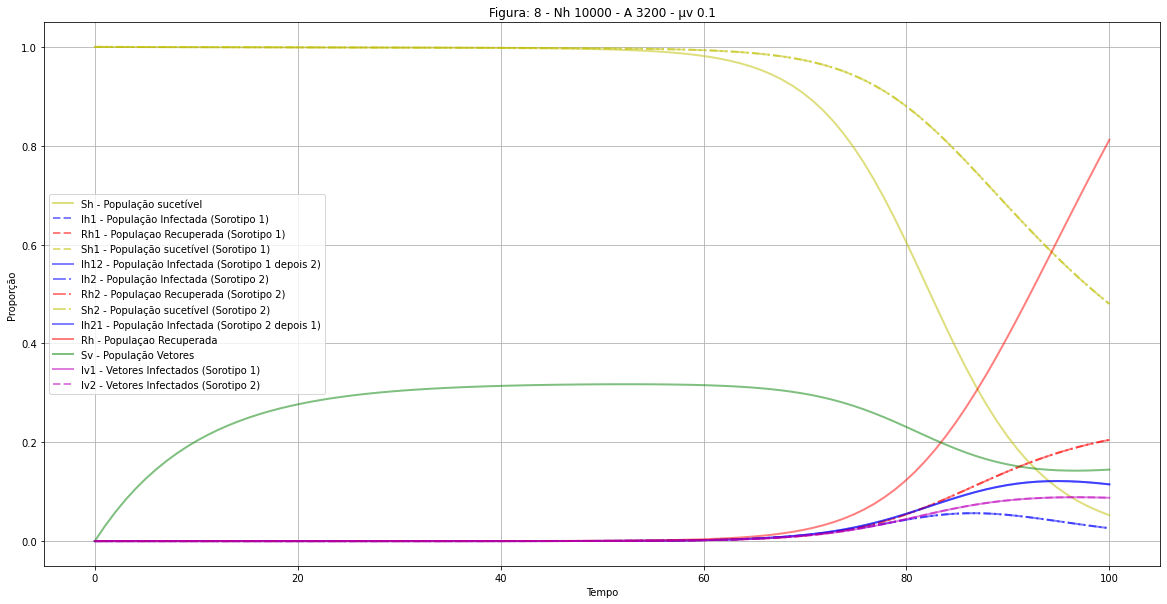

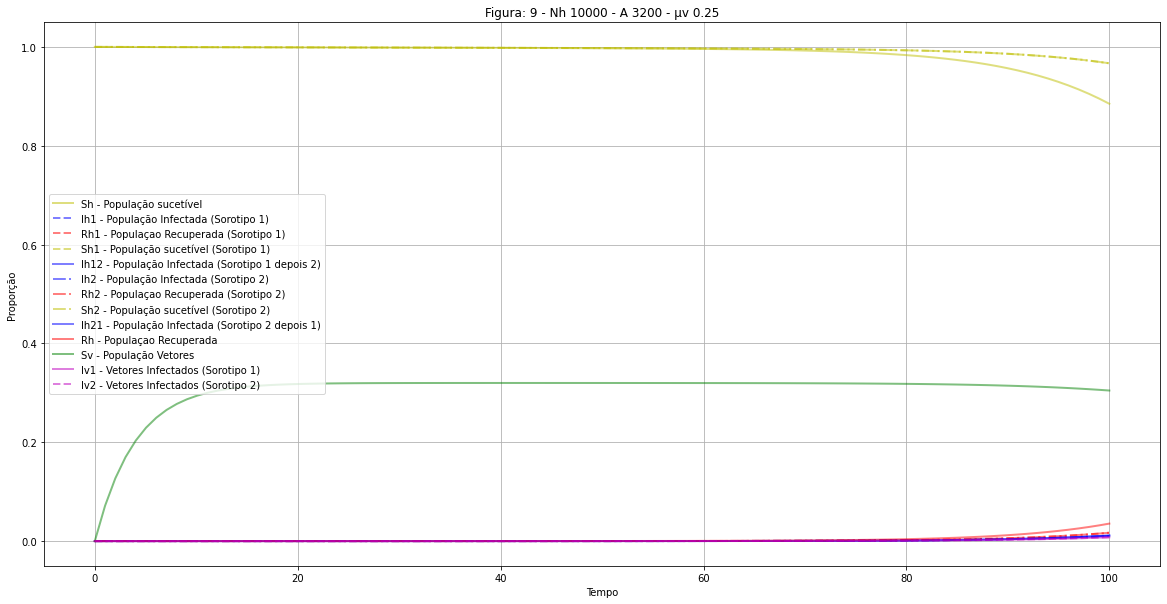

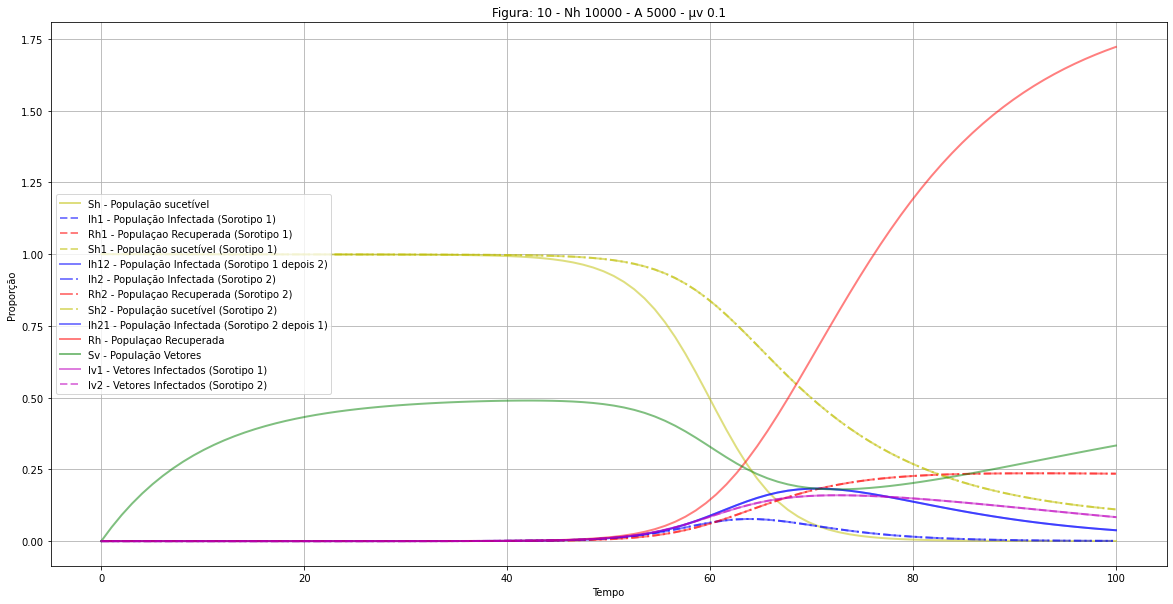

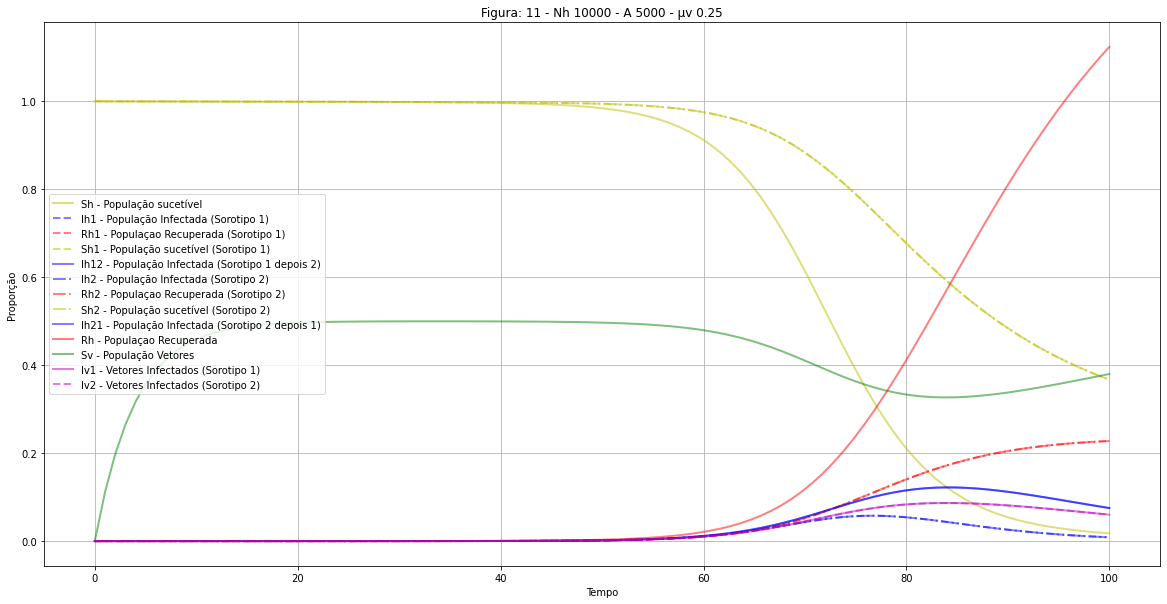

In [ ]:
for idx, (Nh, A, u_v) in enumerate(itertools.product(populacao, novos_mosquitos, mortalide_mosquitos)):
    
    # βh Probabilidade de transmissão do Vetor -> Humanos
    Bh = 0.4 # [3]
    # Taxa de humanos infectados que se recuperam e ficam imunes a doença;
    gamma = 0.167 # [2]

    phi = 0.00165
    alpha = 0.02
    # μh Taxa percapita de mortalidade dos humanos não relacionado a doença
    u_h = 0.0000457 # [3]
    # b, Quantas vezes por dia um mosquito morde as pessoas.
    b1 = 1 # [3]
    b2 = 1 # [3]
    # m, Numero dos hospediros alternativos;
    m1 = 0
    m2 = 0 # [3]
    # βv Probabilidade de transmissão Humano -> Vetor
    Bv = 0.4 # [3]
    # Infected Humans: Número de individuos infectados quando o modelo começou a rodar;
    Ih = infectados
    Ih1 = infectados
    Ih2 = infectados
    Ih12 = infectados
    Ih21 = infectados 
    # Número de individuos recuperados no inicio da execução do modelo;
    Rh1 = infectados 
    Rh2 = infectados 
    Rh = infectados 
    # Susceptible Vectors: O número de vetores suscetíveis no início da execução do modelo.
    Sv = 0
    # Infected Vector: O número de vetores infectados no início da execução do modelo.
    Iv1 = 0
    Iv2 = 0
    # Initial: Numero dos humanos sucetiveis no inicio do modelo
    Sh = Nh - Ih
    Sh1 = Nh - Ih1 - Ih21
    Sh2 = Nh - Ih2 - Ih12

    t = np.linspace(0, 100, 100)
    
    y0 = Sh, Ih1, Rh1, Sh1, Ih12, Ih2, Rh2, Sh2, Ih21, Rh, Sv, Iv1, Iv2 # Vetor de condições inciais
    args = Nh, Bh, gamma, phi, alpha, u_h, b1, b2, m1, m2, A, u_v, Bv

    ret = scipy.integrate.odeint(sir_vetorial_multiple_model, y0, t, args=args)
    Sh, Ih1, Rh1, Sh1, Ih12, Ih2, Rh2, Sh2, Ih21, Rh, Sv, Iv1, Iv2 = ret.T
    
    plt.figure(figsize=[20,10])
    plt.plot(t, Sh/Nh, 'y', alpha=0.5, lw=2, label='Sh - População sucetível')
    plt.plot(t, Ih1/Nh, 'b--', alpha=0.5, lw=2, label='Ih1 - População Infectada (Sorotipo 1)')
    plt.plot(t, Rh1/Nh, 'r--', alpha=0.5, lw=2, label='Rh1 - Populaçao Recuperada (Sorotipo 1)')
    plt.plot(t, Sh1/Nh, 'y--', alpha=0.5, lw=2, label='Sh1 - População sucetível (Sorotipo 1)')
    plt.plot(t, Ih12/Nh, 'b', alpha=0.5, lw=2, label='Ih12 - População Infectada (Sorotipo 1 depois 2)')
    plt.plot(t, Ih2/Nh, 'b-.', alpha=0.5, lw=2, label='Ih2 - População Infectada (Sorotipo 2)')
    plt.plot(t, Rh2/Nh, 'r-.', alpha=0.5, lw=2, label='Rh2 - Populaçao Recuperada (Sorotipo 2)')
    plt.plot(t, Sh2/Nh, 'y-.', alpha=0.5, lw=2, label='Sh2 - População sucetível (Sorotipo 2)')
    plt.plot(t, Ih21/Nh, 'b', alpha=0.5, lw=2, label='Ih21 - População Infectada (Sorotipo 2 depois 1)')
    plt.plot(t, Rh/Nh, 'r', alpha=0.5, lw=2, label='Rh - Populaçao Recuperada')
    plt.plot(t, Sv/Nh, 'g', alpha=0.5, lw=2, label='Sv - População Vetores')
    plt.plot(t, Iv1/Nh, 'm', alpha=0.5, lw=2, label='Iv1 - Vetores Infectados (Sorotipo 1)')
    plt.plot(t, Iv2/Nh, 'm--', alpha=0.5, lw=2, label='Iv2 - Vetores Infectados (Sorotipo 2)')

    plt.grid()
    plt.legend(loc='center left')
    plt.xlabel("Tempo")
    plt.ylabel("Proporção")
    plt.title("Figura: {} - Nh {} - A {} - μv {}".format(idx+8, Nh, A, u_v))
    plt.show()

Na Figura 8, podemos observar que a população de humanos se mantem estável até aproximadamente o 60° dia que pode ser observado pela transferência da população humana para infectados de cada sorotipo que segue sobrepondo por ser a mesma taxa da mesma forma que os vetores ficam infectados. Porém com a queda de mosquitos, os humanos vão se recuperando e a doença não consegue mais se itensificar, mesmo após ser infectado por 2 sorotipos (idependente da ordem).

Para a Figura 9, em comparação a simulação anterior, aumentou-se a taxa de mortalidade dos dois sorotipos de vetores levando há um contágio muito baixo da doença. Isso se deve de que a densidade de vetores de ambos sorotipos da Dengue ser muito inferior aos humanos, não havendo proliferação suficiente para um surto endêmico.

Nas Figuras 10 e 11, a plotagem do modelo é bem similar com as infecções dos humanos acontecendo aproximadamente no 60° dia. A principal diferença entre as duas simulações é que na Figura 11, mesmo com a taxa de mortalidade do vetor ser maior, ocorre um atraso para decair o Sh.

# Conclusão



---



Com a realização deste Trabalho, foi possível observar o comportamento do modelo epidêmico matemático SIR-Vetorial na análise e modelagem de sistemas dinâmicos para o espalhamento de doenças. Os parâmetros foram utilizados com base na realidade do Brasil com dados do IBGE para estudar os casos de Dengue de até dois sorotipos. Além disso, foi possível adaptar o modelo conforme a declaração das populações de humanos e vetores assim com as taxas, permitindo uma análise mais precisa.